In [7]:
import pickle
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
parameters = {
    'path': os.path.dirname(sys.path[0]),
    'path_in': os.path.join(os.path.dirname(sys.path[0]), '01_data'),
    'path_out': os.path.join(os.path.dirname(sys.path[0]), '02_output')
}

In [9]:
# Función para desempaquetar los archivos
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Lista para almacenar los datos
batches = []

# Update the data_dir path to the correct directory path
data_dir = os.path.join('../01_data', 'cifar-10-batches-py')

# Cargar cada archivo en la carpeta
for filename in os.listdir(data_dir):
    if filename.startswith('data'):
        file_path = os.path.join(data_dir, filename)
        print(filename)
        data_dict = unpickle(file_path)
        batches.append(data_dict)

# Ahora 'data' es una lista con todas las imágenes del conjunto de datos
print(f'Número total de batches procesados: {len(batches)}')

data_batch_1
data_batch_2
data_batch_5
data_batch_4
data_batch_3
data_test_batch
Número total de batches procesados: 6


In [10]:
# Extraer la data y las etiquetas
data = np.vstack([batch[b'data'] for batch in batches])
labels = np.hstack([batch[b'labels'] for batch in batches])

In [11]:
meta_data = unpickle(os.path.join(data_dir, 'batches.meta'))
label_meta = meta_data[b'label_names']
label_mapping = {i: label_meta[i].decode('utf-8') for i in range(len(label_meta))}
label_mapping

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

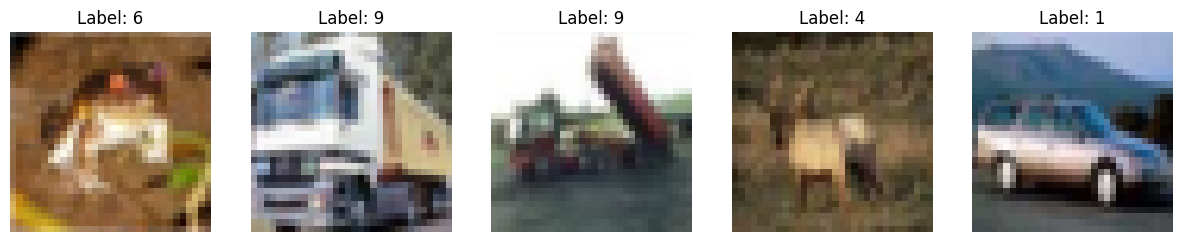

In [12]:
# Función para convertir los datos planos en imágenes de 32x32x3
def unpack_image(data, index):
    image = data[index].reshape(3, 32, 32).transpose(1, 2, 0)
    return image

# Visualizar las primeras 5 imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    img = unpack_image(data, i)
    ax.imshow(img)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.show()

In [13]:
# Convertir la lista en un array de numpy
data_array = np.array(data)

# Convertir el array en un DataFrame de pandas
df = pd.DataFrame(data_array)
df["labels"] = labels
df["label_name"] = df["labels"].map(label_mapping)
df

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,labels,label_name
0,59,43,50,68,98,119,139,145,149,149,...,65,59,46,57,104,140,84,72,6,frog
1,154,126,105,102,125,155,172,180,142,111,...,67,101,122,133,136,139,142,144,9,truck
2,255,253,253,253,253,253,253,253,253,253,...,80,69,66,72,79,83,83,84,9,truck
3,28,37,38,42,44,40,40,24,32,43,...,59,42,44,48,38,28,37,46,4,deer
4,170,168,177,183,181,177,181,184,189,189,...,85,82,83,79,78,82,78,80,1,automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,8,ship
59996,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,3,cat
59997,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,5,dog
59998,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,1,automobile


In [14]:
df.value_counts("label_name")

label_name
airplane      6000
automobile    6000
bird          6000
cat           6000
deer          6000
dog           6000
frog          6000
horse         6000
ship          6000
truck         6000
Name: count, dtype: int64

Según GPT:

Para simular ruido speckle en imágenes digitales, puedes utilizar la siguiente fórmula matemática:

$ I_{\text{noisy}} = I \times N $

Donde:

- \( I \) representa la imagen original.
- \( N \) es la matriz de ruido speckle que se multiplica elemento a elemento por la imagen.
- \( I_{\text{noisy}} \) es la imagen resultante con ruido speckle.

### Componentes de la Fórmula

1. *\( I \) - Imagen Original*: Esta es la matriz de píxeles de la imagen original que quieres modificar. Cada elemento de \( I \) representa la intensidad de un píxel en uno de los canales de color (Rojo, Verde o Azul) si estás trabajando con imágenes en color.

2. *\( N \) - Matriz de Ruido Speckle*:
   - \( N \) se genera a partir de una distribución normal, centrada en 1 para mantener el brillo promedio de la imagen aproximadamente igual.
   - La forma de \( N \) es idéntica a la de \( I \) para asegurar que cada píxel de la imagen original es modificado por un valor de ruido correspondiente.
   - La matriz de ruido se define como:
   
     \[ N = 1 + \sigma \times \text{randn}(m, n, c) \]

     donde \( \text{randn}(m, n, c) \) genera valores de una distribución normal estándar (media 0, varianza 1) para una imagen de tamaño \( m \times n \) con \( c \) canales de color, y \( \sigma \) es la desviación estándar del ruido.

3. *Desviación Estándar \( \sigma \)*:
   - *Controla la intensidad del ruido*: Cuanto mayor sea el valor de \( \sigma \), más significativas serán las variaciones de intensidad debidas al ruido. Un \( \sigma \) alto resulta en una imagen con un patrón de manchas más pronunciado y potencialmente más disruptivo.
   - *Selección basada en la aplicación*: El valor de \( \sigma \) se elige según el grado de ruido que se desee simular. Valores pequeños (como 0.1 o 0.2) añaden un ligero ruido que podría simular efectos de textura fina, mientras que valores mayores (como 0.5 o 1.0) crean efectos visuales más dramáticos y pueden ser útiles para pruebas de robustez de algoritmos de procesamiento de imágenes.

### Ejemplo Visual de Aplicación

Utilizando un valor de \( \sigma \), puedes ajustar visualmente el efecto del ruido sobre la imagen para ilustrar cómo diferentes niveles de ruido speckle afectan la percepción y el análisis de las imágenes. Esto es particularmente útil en campos como la imagen médica, donde el ruido speckle puede tanto ocultar como revelar características diagnósticas importantes dependiendo de su intensidad y la naturaleza del ruido.

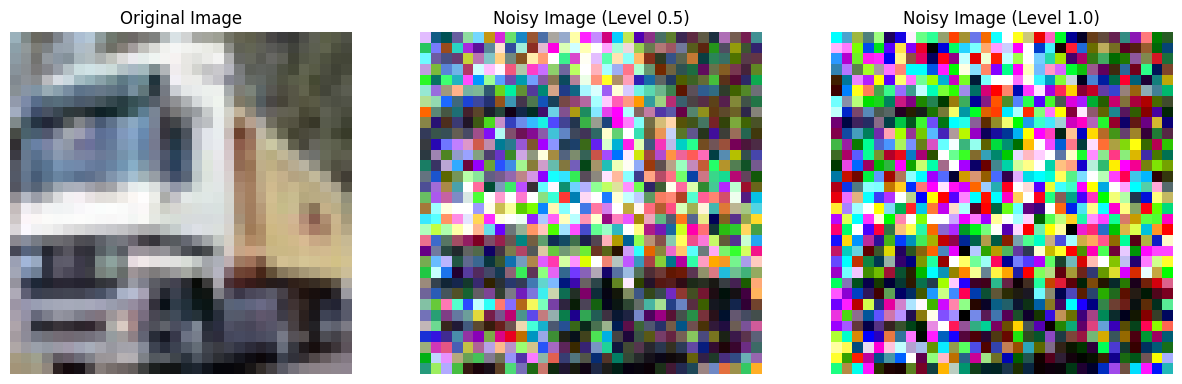

In [15]:
def add_speckle_noise(image, noise_level):
    # Generar ruido speckle
    noise = noise_level * np.random.randn(*image.shape)
    noisy_image = image + image * noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Asegurar que los valores de píxel sigan siendo válidos
    return noisy_image.astype(np.uint8)

# Aplicar ruido speckle a la primera imagen con dos niveles diferentes de ruido
noise_levels = [0.5, 1.0]  # Desviación estándar para el ruido medio y alto
original_image = unpack_image(data, 1)
noisy_images = [add_speckle_noise(original_image, level) for level in noise_levels]

# Mostrar la imagen original y las imágenes con ruido
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, ax in enumerate(axes[1:], start=1):
    ax.imshow(noisy_images[i-1])
    ax.set_title(f'Noisy Image (Level {noise_levels[i-1]})')
    ax.axis('off')

plt.show()

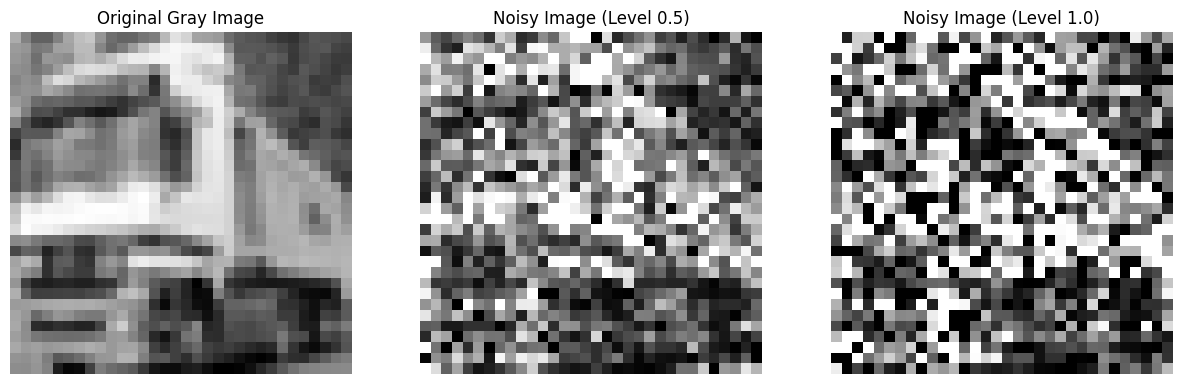

In [16]:
def imgTo1D(img):
    resultado = []
    for i in img:
        for j in i:
            resultado.append(np.mean(j))
    return np.asarray(resultado).reshape(1, 32, 32).transpose(1, 2, 0)

images1D = []
for i, img in enumerate(data):
    resultadoImgTo1D = imgTo1D(unpack_image(data, i))
    images1D.append(resultadoImgTo1D)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(images1D[1], cmap='gray')
axes[0].set_title('Original Gray Image')
axes[0].axis('off')

# Aplicar ruido speckle a la primera imagen con dos niveles diferentes de ruido
noise_levels = [0.5, 1.0]  # Desviación estándar para el ruido medio y alto
gray_noisy_images = [add_speckle_noise(images1D[1], level) for level in noise_levels]
for i, ax in enumerate(axes[1:], start=1):
    ax.imshow(gray_noisy_images[i-1], cmap='gray')
    ax.set_title(f'Noisy Image (Level {noise_levels[i-1]})')
    ax.axis('off')

plt.show()


In [17]:
# Generar ruido speckle para todas las imágenes en datasets diferentes
noisy_data_dir = os.path.join(parameters['path_out'], 'noisy-data')
os.makedirs(noisy_data_dir, exist_ok=True)

# df_noisy_medium = pd.DataFrame()
df_noisy_high = pd.DataFrame()
data_medium = []
label_noisy_image_medium = []
data_high = []


# Generar ruido speckle para todas las imágenes
for i, image in enumerate(images1D):
    noisy_image_medium = add_speckle_noise(imgTo1D(images1D[i]), 0.5).transpose(2, 0, 1).reshape(-1)
    label_noisy_image_medium = labels[i]
    noisy_image_high = add_speckle_noise(imgTo1D(images1D[i]), 1.0).transpose(2, 0, 1).reshape(-1)
    label_noisy_image_high = labels[i]

    data_medium.append(noisy_image_medium)
    data_high.append(noisy_image_high)



In [18]:
df_noisy_medium = pd.DataFrame(data_medium)
df_noisy_medium

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,83,28,61,34,89,148,33,18,94,139,...,147,2,93,81,22,98,88,255,54,117
1,255,194,52,174,242,255,56,255,89,248,...,35,58,86,77,94,121,95,176,76,210
2,255,240,214,255,230,255,255,255,255,13,...,42,51,114,73,70,92,91,46,96,4
3,19,18,17,28,26,42,15,22,12,13,...,92,41,91,91,50,83,14,56,71,111
4,0,146,215,142,234,174,239,163,180,51,...,134,78,171,98,118,62,59,82,68,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,109,86,78,137,66,88,82,99,28,161,...,255,175,206,255,255,232,255,255,255,255
59996,107,54,75,31,42,55,195,202,77,137,...,100,187,182,198,139,122,11,110,217,126
59997,24,18,9,17,3,17,14,8,3,15,...,143,69,85,30,46,53,67,28,61,14
59998,25,4,46,35,7,21,66,17,54,0,...,102,21,3,76,90,30,0,110,114,120


In [19]:
df_noisy_high = pd.DataFrame(data_high)
df_noisy_high

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,31,38,47,122,149,189,255,255,129,240,...,218,129,151,43,35,40,0,27,161,255
1,217,250,176,0,4,255,236,255,193,70,...,0,52,0,255,255,91,72,255,27,224
2,0,255,255,17,255,0,0,120,99,0,...,91,0,93,96,27,81,0,0,81,48
3,17,54,47,46,60,67,0,0,63,103,...,48,0,0,58,103,69,29,44,49,112
4,27,98,255,255,255,186,54,50,255,0,...,27,0,39,27,0,2,0,0,27,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,212,131,32,70,27,0,230,156,104,39,...,255,238,255,255,255,255,145,255,74,0
59996,101,164,0,139,27,72,168,182,0,255,...,168,0,0,31,49,119,0,72,14,255
59997,0,0,8,0,6,10,2,23,6,0,...,0,85,129,0,48,49,61,35,55,5
59998,52,8,9,19,0,125,166,215,41,0,...,46,182,86,105,155,134,73,103,0,255
